## Imports

In [1]:
import sys
sys.path.append('../')
import os
import numpy as np
from dataset.natural_scenes import NaturalScenesDataset
import numpy as np
import matplotlib.pyplot as plt
from utils.coco_utils import coco_annotation
from utils.image_search import build_inverted_index
import json
from nilearn import datasets
from nilearn import plotting

### Global variables

In [3]:
subject = 1
partition = 'debug_train'
data_root = '../data/'
roi = 'floc-faces'
hemisphere = 'left'

dataset = NaturalScenesDataset(data_root, subject, partition, roi, hemisphere)

## Visualize an image

0.  A man riding skis down a snow covered ski slope.
1.  A skier glides down a snowy mountain passing a red flag.
2.  The skier speeds around a flag, heading down the slope.
3.  a skier skiing past a red sign on a snowy mountain
4.  a skier in a green shirt is coming down a mountain


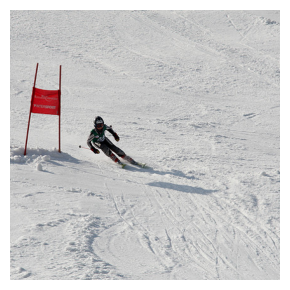

In [6]:
# Load image from dataset
idx = 42 # or randomize through np.random.randint(len(dataset))
img, coco_id = dataset[idx]

# Print avaliable caption annotations
annot, nouns = coco_annotation(coco_id, data_root, True)
for i, a in enumerate(annot):
    print(f'{i}. ', a['caption'])

# Plot image
f = plt.figure(figsize=(3, 3))
plt.imshow(img.permute(1, 2, 0))
plt.axis('off')
plt.tight_layout()
plt.show()

## Search images that match a word

Found 351 images with the queried noun.


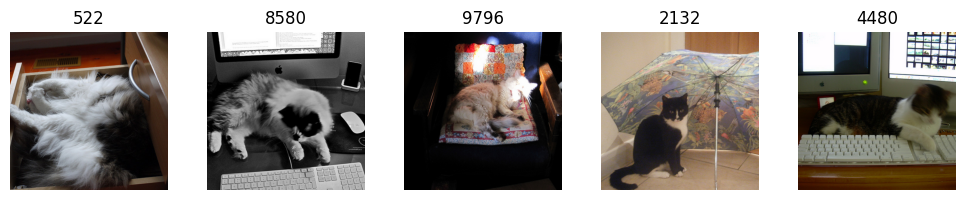

In [9]:
# Load inverted index
f = os.path.join(data_root, f'subj{subject:02d}/inverted_index_{partition.replace("debug_", "")}.json')
if not os.path.exists(f):
    build_inverted_index(data_root, subject)
index = json.load(open(f, 'r'))

# Search 5 images with the queried noun
query = 'cat'
indices = index[query]
print(f'Found {len(indices)} images with the queried noun.')
indices = np.random.choice(indices, 5)
f, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    img, _ = dataset[indices[i]]
    axes[i].imshow(img.permute(1, 2, 0))
    axes[i].axis('off')
    axes[i].set_title(indices[i])
plt.tight_layout()
plt.show()

## Visualize fMRI activations

In [5]:
# TODO: Plot averaged fMRI for a list of indices

In [6]:
num_samples = 400

query = 'dish'
means1 = []
indices = index[query]
indices = np.random.choice(indices, num_samples)
for idx in indices:
    _, fmri, _ = dataset[idx]
    means1.append(fmri.mean())

print(f'Mean {roi} response for {query}: {np.mean(means1)}')

query = 'woman'
means2 = []
indices = index[query]
indices = np.random.choice(indices, num_samples)
for idx in indices:
    _, fmri, _ = dataset[idx]
    means2.append(fmri.mean())

print(f'Mean {roi} response for {query}: {np.mean(means2)}')

Mean floc-faces response for dish: -0.10945180803537369
Mean floc-faces response for woman: 0.24463604390621185
